# Autovalores, autovectores, polinomio caracteristico, diagonalización

| Librería | Función | Explicación |
| --- | --- | --- |
| numpy | numpy.linalg.eig | Calcula los autovalores y autovectores derechos de una matriz cuadrada |
| numpy | numpy.linalg.eigh | Calcula los autovalores y autovectores de una matriz hermítica compleja o simétrica real |
| numpy | numpy.poly | Calcula el polinomio característico de una matriz |
| sympy | sympy.Matrix.eigenvals | Calcula los autovalores de una matriz simbólica |
| sympy | sympy.Matrix.eigenvects | Calcula los autovalores y autovectores de una matriz simbólica |
| sympy | sympy.Matrix.charpoly | Calcula el polinomio característico de una matriz simbólica |

Calcular el polinomio caracteristico, los  autovalores y autvectores propios de la siguiente matrices, comprobar con la solucion analitica:

1. 
\begin{bmatrix}
1 & -1 & 4 \\
3 & 2 & -1 \\
2 & 1 & -1
\end{bmatrix}


2. \begin{bmatrix}
3 & -5 \\
1 & -1 \\
\end{bmatrix}





In [1]:
#@title Librerías
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

##Primera Matriz

In [2]:
#Creemos la matriz
M1 = np.array([[1,-1,4],[3,2,-1],[2,1,-1]])
M1

array([[ 1, -1,  4],
       [ 3,  2, -1],
       [ 2,  1, -1]])

Polinomio Característico

In [3]:
#Encontramos los coefiecietes del polinomio.
coePoli1 = np.poly(M1)
#Creamos el polinomio
polinomio1 = np.poly1d(coePoli1)
print(polinomio1)

   3     2
1 x - 2 x - 5 x + 6


Autovalores

In [4]:
autoval1 = np.linalg.eig(M1)
autoval1

(array([ 3., -2.,  1.]),
 array([[ 0.40824829,  0.57735027,  0.23570226],
        [ 0.81649658, -0.57735027, -0.94280904],
        [ 0.40824829, -0.57735027, -0.23570226]]))

Diagonalización

In [5]:
P1 = autoval1[1]
Pinv1 = np.linalg.inv(P1)
diagonal1 = Pinv1@M1@P1
diagonal1

array([[ 3.00000000e+00, -1.33226763e-15, -1.66533454e-15],
       [ 1.11022302e-15, -2.00000000e+00, -2.44249065e-15],
       [ 3.33066907e-16, -8.88178420e-16,  1.00000000e+00]])

##Segunda Matriz

In [6]:
M2 = np.array([[3,-5],[1,-1]])
M2

array([[ 3, -5],
       [ 1, -1]])

Polinomio Característico

In [7]:
#Encontramos los coefiecietes del polinomio.
coePoli2 = np.poly(M2)
#Creamos el polinomio
polinomio2 = np.poly1d(coePoli2)
print(polinomio2)

   2
1 x - 2 x + 2


Autovalores

In [8]:
autoval2 = np.linalg.eig(M2)
autoval2

(array([1.+1.j, 1.-1.j]),
 array([[0.91287093+0.j        , 0.91287093-0.j        ],
        [0.36514837-0.18257419j, 0.36514837+0.18257419j]]))

Diagonalización

In [9]:
P2 = autoval2[1]
Pinv2 = np.linalg.inv(P2)
diagonal2 = Pinv2@M2@P2
diagonal2

array([[ 1.00000000e+00+1.00000000e+00j, -1.11022302e-16-3.88578059e-16j],
       [-5.55111512e-17+4.99600361e-16j,  1.00000000e+00-1.00000000e+00j]])

# Diagonalizacion 
Una matriz cuadrada $A$ es diagonalizable si y solo si cada autovalor $\lambda$ de multiplicidad $m$ produce exactamente $m$ autovectores básicos; es decir, si y solo si la solución general del sistema $(A-I\lambda)\vec{x}=0$ tiene exactamente $m$ parámetros.


Para diagonalizar una matriz $A$, se necesita encontrar una matriz invertible $P$ tal que $P^{-1}AP$ sea una matriz diagonal $D$. Esto significa que las columnas de $P$ son los autovectores de $A$ y los elementos de la diagonal de $D$ son los autovalores correspondientes de $A$.

Encuentre la matrix diagnonal para las matrices anteriores. 



##Actividad 2. 

Considere la ecuación cuadrática $x^2-4xy+3y^2=6$, esta ecuación cuadrática se corresponde a una hiperbola, la cual puede ser escrita en forma matricial como sigue:

$A\vec{v} \cdot \vec{v}=6$, donde $\vec{v}=(x, y)$ y A es una matrix simetrica, 

\begin{equation}
A=\begin{bmatrix}
1 & -2 \\
-2 & 3 \\
\end{bmatrix}
\end{equation}

1. Realice un grafico que represente la hyperbola

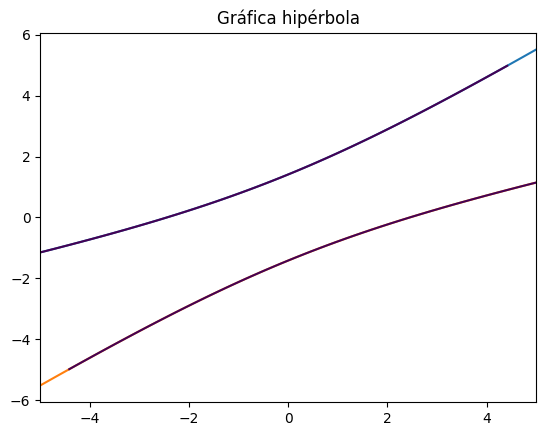

In [12]:
#@title Gráfico de la hipérbola
hiperbola1 = lambda x: np.sqrt(2 + (1/9)*x**2) +  (2/3)*x
hiperbola2 = lambda x: (-1)*(np.sqrt(2 + (1/9)*x**2)) + (2/3)*x
domx = np.linspace(-5,5,100)
plt.plot(domx,hiperbola1(domx))
plt.plot(domx,hiperbola2(domx))
plt.contour(x,y,x**2 - 4*x*y + 3*y**2 - 6,[0]);

plt.title('Gráfica hipérbola');

Text(0.5, 1.0, 'Gráfico con Contour')

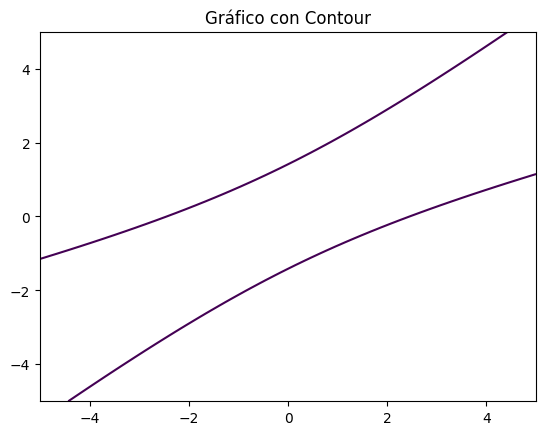

In [11]:
#Con contour
domy = np.linspace(-5,5,100)
x,y = np.meshgrid(domx,domy)
plt.contour(x,y,x**2 - 4*x*y + 3*y**2 - 6,[0]);
plt.title('Gráfico con Contour')

In [21]:
#Vamos a diagonalizar A
A = np.array([[1,-2],[-2,3]])
#Encontremos los valores y vectores propios de la matriz
vp1,vec1 = np.linalg.eigh(A)
Q = vec1
QT = Q.T
D = QT@A@Q
D
D_ = Q@D@QT
D_

array([[ 1., -2.],
       [-2.,  3.]])

Para verificar que sea diagonalizable, revisemos si se cumple que A =QDQT


In [24]:
#La reescribimos
D_ = np.array([[1,-2],[-2,3]])
D_ == A

array([[ True,  True],
       [ True,  True]])

Luego :


\begin{equation}
(D\vec{u}) \cdot \vec{u}=d
\end{equation}

donde $\vec{u}=(x', y')$, tal que $D\vec{u} \cdot \vec{u}=d$ es una nueva hyperbola 

In [29]:
#Creemos el vector u
x = sp.symbols('x')
y = sp.symbols('y')
u = np.array([x,y])
m1 = D@u
d = np.dot(m1,u)
d

x*(-0.23606797749979*x + 3.48462032026995e-16*y) + y*(3.10277309985749e-16*x + 4.23606797749979*y)

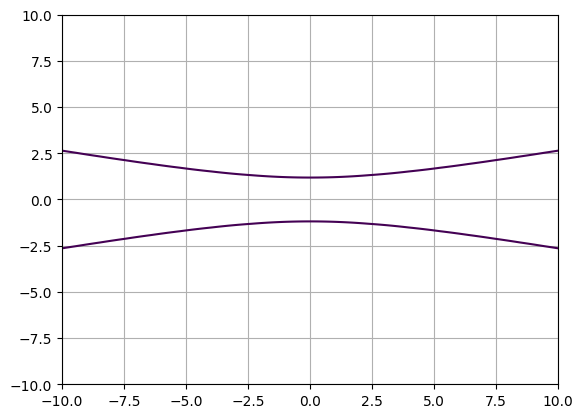

In [37]:
hiperbola = lambda x, y: x * (-0.23606797749979 * x - 3.46944695195361e-16 * y) + y * (-2.22044604925031e-16 * x + 4.23606797749979 * y) - 6
x = np.linspace(-10., 10., 100)
y = np.linspace(-10., 10., 100)

X, Y = np.meshgrid(x, y)
Z = hiperbola(X, Y)

plt.contour(X, Y, Z, [0])
plt.grid();

In [ ]:
Hyp = lambda x, y: x*(-0.23606797749979*x - 3.46944695195361e-16*y) + y*(-2.22044604925031e-16*x + 4.23606797749979*y) - 6
